# Medical Cost Personal Insurance Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#importing th data set
mcost = pd.read_csv("medical_cost_insurance.csv")
mcost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
mcost.shape

(1338, 7)

In [4]:
mcost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
 mcost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here we can see there are no missing values.
we have three categorical value 1) sex 2) smoker 3) region

## summary statistics

In [6]:
mcost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## EDA

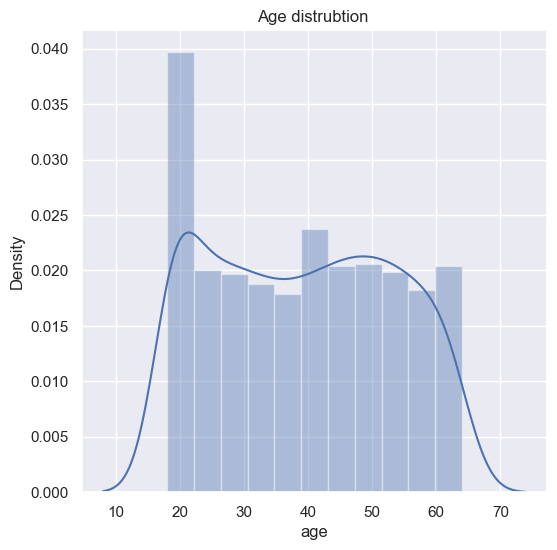

In [7]:
# age distrubtion 
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(mcost["age"])
plt.title("Age distrubtion ")
plt.show()

Here we can see there is a normal distributation also the density of the age between 18 to 22 is very high.

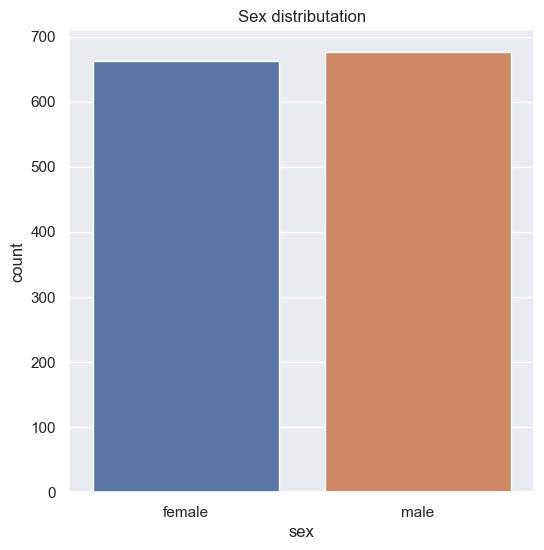

In [8]:
# Sex distributation
plt.figure(figsize = (6,6))
sns.countplot(mcost['sex'])
plt.title("Sex distributation")
plt.show()

In [9]:
#total number of insurance contractor gender, female, male
mcost['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

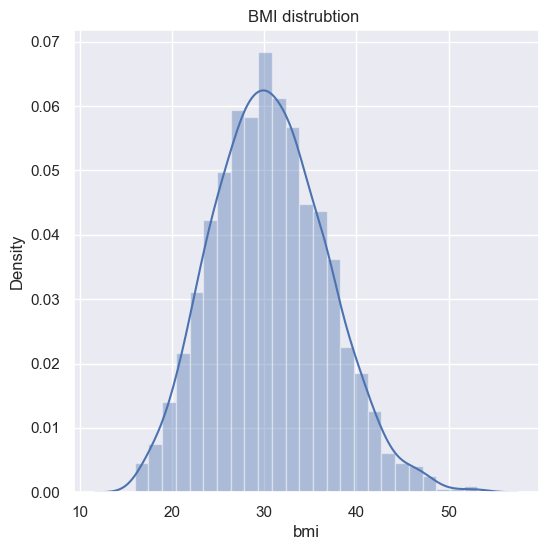

In [10]:
# BMI distrubtion 
plt.figure(figsize = (6,6))
sns.distplot(mcost["bmi"])
plt.title("BMI distrubtion ")
plt.show()

here is a normal distributation .

Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

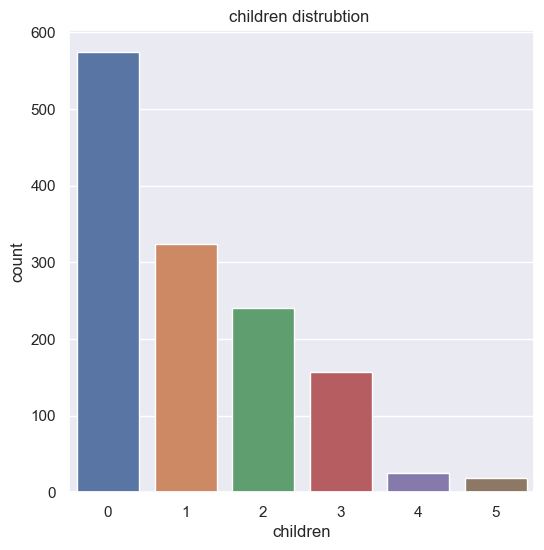

In [11]:
# children distrubtion 
plt.figure(figsize = (6,6))
sns.countplot(mcost["children"])
plt.title("children distrubtion ")
plt.show()

In [12]:
# Number of children covered by health insurance / Number of dependents
mcost['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

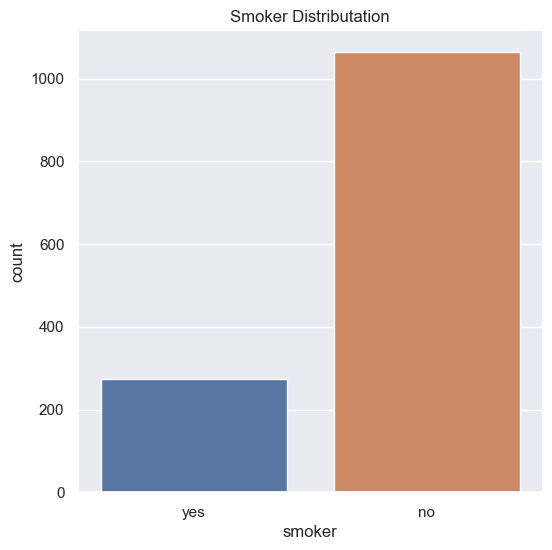

In [13]:
# smoker Distributation
plt.figure(figsize=(6,6))
sns.countplot(mcost['smoker'])
plt.title("Smoker Distributation")
plt.show()

In [14]:
# total no of smoker and non-smoker
mcost["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

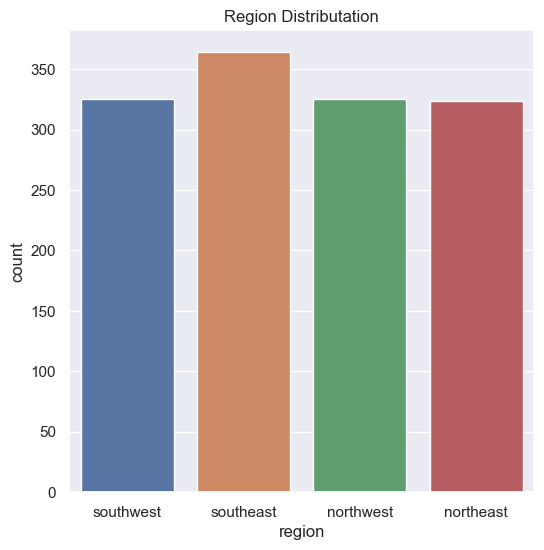

In [15]:
# Region Distributation
plt.figure(figsize=(6,6))
sns.countplot(mcost['region'])
plt.title("Region Distributation")
plt.show()

The data is almost similar for all the values ,little more for the southeast region.

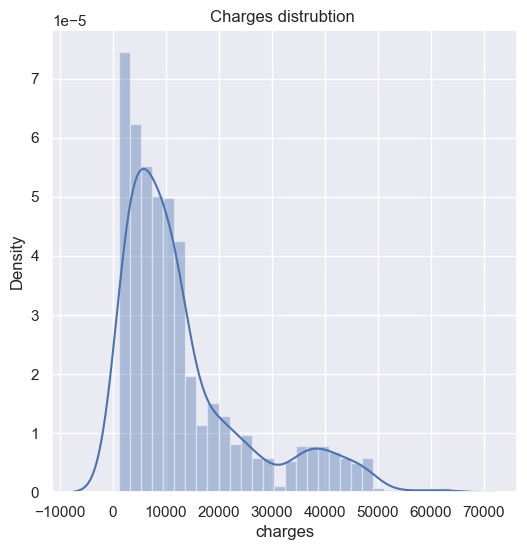

In [16]:
# Charges Distributation
plt.figure(figsize = (6,6))
sns.distplot(mcost["charges"])
plt.title("Charges distrubtion ")
plt.show()

We have lots of data which is around 10,000 to 20,000 and very less data is for 30,000 to 40,000

## Preprocessing the data

In [17]:
# Using label encoding we  change the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

In [18]:
mcost.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [19]:
le = LabelEncoder()
mcost["sex"]=le.fit_transform(mcost["sex"])

In [20]:
mcost["smoker"]=le.fit_transform(mcost["smoker"])
mcost["region"]=le.fit_transform(mcost["region"])

In [21]:
mcost.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


labels 

* sex --> male = 1 and female = 0

* smoker --> yes =1 and no = 0

* region --> northeast = 0 ,northwest = 1 ,southeast = 2 ,southwest = 3

In [22]:
#spliting the data into input and the target variable
x = mcost.iloc[:,:-1]  
y = mcost.iloc[:,-1]

In [23]:
x.shape

(1338, 6)

In [24]:
y.shape

(1338,)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
st = StandardScaler()

In [27]:
st.fit(x)
x_data=st.transform(x)
x_data=pd.DataFrame(x_data,columns=x.columns)

## Train Test Split

In [28]:
# spliting training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.33, random_state = 43)

In [29]:
# Training Data
print("Training data : " ,x_train.shape, y_train.shape)

Training data :  (896, 6) (896,)


In [30]:
# Testing Data
print("Testing Data : ",x_test.shape, y_test.shape)

Testing Data :  (442, 6) (442,)


Model Building

In [31]:
# libraries
from sklearn.metrics import r2_score,mean_squared_error


In [32]:
#Logistic Regression

le = LinearRegression()
le.fit(x_train,y_train)
train_prediction = le.predict(x_train)
test_prediction = le.predict(x_test)
# train data scores
r2_score_train = r2_score(y_train,train_prediction)
print("The r2 score for training data is :",r2_score_train)

# test data scores
r2_score_test = r2_score(y_test,test_prediction)


print("The r2_score is :",r2_score_test)


The r2 score for training data is : 0.7423328359994894
The r2_score is : 0.7584148022944477


In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
# DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
train_prediction = dt.predict(x_train)
test_prediction = dt.predict(x_test)
# train data scores
r2_score_train = r2_score(y_train,train_prediction)
print("The r2 score for the training data is:",r2_score_train)
# test data scores
r2_score_test = r2_score(y_test,test_prediction)

print("The r2_score is :",r2_score_test)

The r2 score for the training data is: 0.9985047627530682
The r2_score is : 0.7177805125173071


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
# RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)
# train data scores
r2_score_train = r2_score(y_train,y_pred_train)
print("The r2 score for the training data is:",r2_score_train)
# test data scores
r2_score_test = r2_score(y_test,y_pred_test)

print("The r2_score is :",r2_score_test)


The r2 score for the training data is: 0.9771537256077224
The r2_score is : 0.8390275874600369


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
# GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_train=gbr.predict(x_train)
y_pred_test=gbr.predict(x_test)
# train data scores
r2_score_train = r2_score(y_train,y_pred_train)
print("The r2 score for the training data is:",r2_score_train)
# test data scores
r2_score_test = r2_score(y_test,y_pred_test)

print("The r2_score is :",r2_score_test)

The r2 score for the training data is: 0.9132208537255745
The r2_score is : 0.858665737372381


In [39]:
from sklearn.svm import SVR

In [40]:
# SVR
kernel = ["poly","linear", "poly", "rbf", "sigmoid"]
for i in kernel:
    print(i)
    svr = SVR(kernel = i)
    svr.fit(x_train,y_train)
    y_pred_train=svr.predict(x_train)
    y_pred_test=svr.predict(x_test)
# train data scores
    r2_score_train = r2_score(y_train,y_pred_train)
    print("The r2 score for the training data is:",r2_score_train)
# test data scores
    r2_score_test = r2_score(y_test,y_pred_test)

    print("The r2_score is :",r2_score_test)
    print("\n")


poly
The r2 score for the training data is: -0.08935765016949637
The r2_score is : -0.1690178939228335


linear
The r2 score for the training data is: -0.12290866114422094
The r2_score is : -0.192174357881141


poly
The r2 score for the training data is: -0.08935765016949637
The r2_score is : -0.1690178939228335


rbf
The r2 score for the training data is: -0.10988241408113031
The r2_score is : -0.18745049446041895


sigmoid
The r2 score for the training data is: -0.11122333574849885
The r2_score is : -0.18816872576632582




Here Gradient Boosting Regressor working well with  0.8587956522618116 r2 score

In [41]:
data = (56,0,39.82,0,0,2)  #11090
array_data = np.asarray(data)
xdata = array_data.reshape(1,-1)
pred = gbr.predict(xdata)
print(np.round(pred,3))

[12270.148]


In [42]:
#Lets save the  model
import joblib  

joblib.dump(gbr, 'cost_prediction.obj')

['cost_prediction.obj']

In [43]:
#loded = joblib.load('cost_prediction.obj')

In [44]:
#loded.predict(x_test)